Marina Dunn

PHYS 243 Midterm Project

Fall 2021

Prof. Mobasher

Goal: Choose from the porvided datasets (Climate Model Simulation Crashes Data Set chosen).

1. Understand and explain the data set.
2. Process data, clean up.
3. Divide your data into a training and test set.
4. Choose the relevant algorithm.
5. Write a python code to perform learning. (You can reuse every code from the lectures) 6. 6. Evaluate your learning performance.
7. Make sure your results does not depend on your choosing parameters.


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import ExtraTreesClassifier


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Processing Data, Cleaning Up

In [84]:
# Read in climate data and format
data = pd.read_table("Full_datasets/1_Climate_simulation_crash/pop_failures.dat", sep= "\s+", usecols=['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4', 'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr', 'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale', 'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq', 'bckgrnd_vdc_psim', 'Prandtl', 'outcome'])
data

Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  \
0        1    1     0.859036  0.927825  0.252866  0.298838  0.170521   
1        1    2     0.606041  0.457728  0.359448  0.306957  0.843331   
2        1    3     0.997600  0.373238  0.517399  0.504993  0.618903   
3        1    4     0.783408  0.104055  0.197533  0.421837  0.742056   
4        1    5     0.406250  0.513199  0.061812  0.635837  0.844798   
..     ...  ...          ...       ...       ...       ...       ...   
535      3  176     0.657136  0.489375  0.133713  0.411950  0.087780   
536      3  177     0.915894  0.842720  0.518947  0.090622  0.336981   
537      3  178     0.478600  0.941185  0.769245  0.950776  0.189406   
538      3  179     0.007793  0.779287  0.867468  0.704820  0.983282   
539      3  180     0.608075  0.031556  0.598264  0.794771  0.145680   

     vconst_7   ah_corr  ah_bolus  ...  efficiency_factor  tidal_mix_max  \
0    0.735936  0.428325  0.567947  ...           0.245675       0.104226   
1    0.934851  0.444572  0.828015  ...           0.616870       0.975786   
2    0.605571  0.746225  0.195928  ...           0.679355       0.803413   
3    0.490828  0.005525  0.392123  ...           0.471463       0.597879   
4    0.441502  0.191926  0.487546  ...           0.551543       0.743877   
..        ...       ...       ...  ...                ...            ...   
535  0.356289  0.480204  0.029678  ...           0.280546       0.384117   
536  0.893576  0.978703  0.674868  ...           0.798108       0.353546   
537  0.112743  0.745645  0.527096  ...           0.193103       0.829563   
538  0.420303  0.710612  0.174746  ...           0.761134       0.436714   
539  0.378183  0.461948  0.425291  ...           0.480938       0.307816   

     vertical_decay_scale  convect_corr  bckgrnd_vdc1  bckgrnd_vdc_ban  \
0                0.869091      0.997518      0.448620         0.307522   
1                0.914344      0.845247      0.864152         0.346713   
2                0.643995      0.718441      0.924775         0.315371   
3                0.761659      0.362751      0.912819         0.977971   
4                0.312349      0.650223      0.522261         0.043545   
..                    ...           ...           ...              ...   
535              0.885948      0.768482      0.459479         0.334482   
536              0.044796      0.990900      0.347027         0.512499   
537              0.101506      0.548878      0.381966         0.198811   
538              0.690132      0.825133      0.981656         0.113193   
539              0.231638      0.464152      0.583558         0.969365   

     bckgrnd_vdc_eq  bckgrnd_vdc_psim   Prandtl  outcome  
0          0.858310          0.796997  0.869893        0  
1          0.356573          0.438447  0.512256        1  
2          0.250642          0.285636  0.365858        1  
3          0.845921          0.699431  0.475987        1  
4          0.376660          0.280098  0.132283        1  
..              ...               ...       ...      ...  
535        0.573002          0.610183  0.737706        1  
536        0.810549          0.593332  0.142565        0  
537        0.867108          0.461632  0.652817        1  
538        0.364799          0.201469  0.536535        1  
539        0.464331          0.760344  0.762439        1  

[540 rows x 21 columns]

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 540 non-null    int64  
 1   Run                   540 non-null    int64  
 2   vconst_corr           540 non-null    float64
 3   vconst_2              540 non-null    float64
 4   vconst_3              540 non-null    float64
 5   vconst_4              540 non-null    float64
 6   vconst_5              540 non-null    float64
 7   vconst_7              540 non-null    float64
 8   ah_corr               540 non-null    float64
 9   ah_bolus              540 non-null    float64
 10  slm_corr              540 non-null    float64
 11  efficiency_factor     540 non-null    float64
 12  tidal_mix_max         540 non-null    float64
 13  vertical_decay_scale  540 non-null    float64
 14  convect_corr          540 non-null    float64
 15  bckgrnd_vdc1          5

In [86]:
data.loc[243]

Study                    2.000000
Run                     64.000000
vconst_corr              0.029674
vconst_2                 0.765069
vconst_3                 0.503872
vconst_4                 0.645791
vconst_5                 0.047242
vconst_7                 0.638945
ah_corr                  0.540829
ah_bolus                 0.080023
slm_corr                 0.475586
efficiency_factor        0.570706
tidal_mix_max            0.338053
vertical_decay_scale     0.743530
convect_corr             0.752362
bckgrnd_vdc1             0.102330
bckgrnd_vdc_ban          0.654078
bckgrnd_vdc_eq           0.060762
bckgrnd_vdc_psim         0.685605
Prandtl                  0.759411
outcome                  1.000000
Name: 243, dtype: float64

In [80]:
failures = data.where(data['outcome'] == 0).dropna(how= 'any')
failures

Study    Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  \
0      1.0    1.0     0.859036  0.927825  0.252866  0.298838  0.170521   
12     1.0   13.0     0.961010  0.976907  0.857929  0.614971  0.615516   
43     1.0   44.0     0.675577  0.904871  0.965467  0.763904  0.633559   
48     1.0   49.0     0.728289  0.783255  0.959955  0.054978  0.422302   
57     1.0   58.0     0.964653  0.867315  0.436953  0.070029  0.144875   
62     1.0   63.0     0.616469  0.741596  0.781656  0.033420  0.239747   
77     1.0   78.0     0.906736  0.845611  0.033890  0.382948  0.645635   
84     1.0   85.0     0.977305  0.597218  0.309078  0.983514  0.279500   
85     1.0   86.0     0.473099  0.979196  0.256344  0.011956  0.553195   
92     1.0   93.0     0.969800  0.691416  0.526029  0.082364  0.104676   
94     1.0   95.0     0.767814  0.862666  0.095828  0.095428  0.510833   
108    1.0  109.0     0.915003  0.889988  0.809433  0.760867  0.688014   
114    1.0  115.0     0.868261  0.909368  0.773757  0.702602  0.340249   
116    1.0  117.0     0.990747  0.611856  0.202425  0.231401  0.049095   
133    1.0  134.0     0.698562  0.749652  0.134890  0.896777  0.368485   
153    1.0  154.0     0.874320  0.959262  0.511062  0.171416  0.448644   
154    1.0  155.0     0.736897  0.659486  0.482061  0.725962  0.981868   
163    1.0  164.0     0.853904  0.482306  0.680326  0.659939  0.604119   
168    1.0  169.0     0.887865  0.841339  0.296520  0.953260  0.890664   
176    1.0  177.0     0.626563  0.816333  0.161814  0.481314  0.762260   
183    2.0    4.0     0.904022  0.870845  0.674137  0.206964  0.470478   
195    2.0   16.0     0.880959  0.678216  0.323977  0.350468  0.196893   
205    2.0   26.0     0.739009  0.881179  0.391904  0.055915  0.116662   
216    2.0   37.0     0.981675  0.977894  0.094386  0.120069  0.925438   
219    2.0   40.0     0.908603  0.546623  0.828465  0.258335  0.629621   
271    2.0   92.0     0.956882  0.736501  0.152274  0.489809  0.312785   
277    2.0   98.0     0.760379  0.969529  0.046424  0.368554  0.093270   
291    2.0  112.0     0.783335  0.892363  0.802123  0.984419  0.212193   
295    2.0  116.0     0.079826  0.203324  0.771970  0.139414  0.021107   
304    2.0  125.0     0.967232  0.642815  0.661939  0.381564  0.457069   
315    2.0  136.0     0.637378  0.628366  0.126606  0.679712  0.082718   
339    2.0  160.0     0.567830  0.944829  0.413111  0.415689  0.699838   
365    3.0    6.0     0.641577  0.721159  0.932896  0.438172  0.375868   
376    3.0   17.0     0.954517  0.584058  0.433498  0.334793  0.563232   
386    3.0   27.0     0.624787  0.945710  0.557552  0.652853  0.481405   
403    3.0   44.0     0.845014  0.610852  0.834904  0.446702  0.976638   
419    3.0   60.0     0.561778  0.959324  0.035378  0.226162  0.280774   
432    3.0   73.0     0.781230  0.826922  0.406354  0.833845  0.365578   
447    3.0   88.0     0.851386  0.997759  0.580561  0.679121  0.530227   
456    3.0   97.0     0.939356  0.751089  0.704236  0.970551  0.642896   
479    3.0  120.0     0.740677  0.621174  0.961412  0.049750  0.947234   
507    3.0  148.0     0.526239  0.910273  0.990928  0.722765  0.139831   
514    3.0  155.0     0.582796  0.770086  0.333053  0.034803  0.307772   
525    3.0  166.0     0.842820  0.877839  0.266809  0.584363  0.161049   
532    3.0  173.0     0.937126  0.673382  0.619243  0.367532  0.852842   
536    3.0  177.0     0.915894  0.842720  0.518947  0.090622  0.336981   

     vconst_7   ah_corr  ah_bolus  ...  efficiency_factor  tidal_mix_max  \
0    0.735936  0.428325  0.567947  ...           0.245675       0.104226   
12   0.352769  0.833960  0.095092  ...           0.954833       0.577182   
43   0.759305  0.216830  0.255341  ...           0.368365       0.747902   
48   0.189559  0.768513  0.898006  ...           0.696245       0.014254   
57   0.199279  0.701177  0.366411  ...           0.127939       0.687026   
62   0.149745  0.405233  0.937797  ...           0.034082       0.6337

In [81]:
successes = data.where(data['outcome'] == 1).dropna(how= 'any')
successes

Study    Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  \
1      1.0    2.0     0.606041  0.457728  0.359448  0.306957  0.843331   
2      1.0    3.0     0.997600  0.373238  0.517399  0.504993  0.618903   
3      1.0    4.0     0.783408  0.104055  0.197533  0.421837  0.742056   
4      1.0    5.0     0.406250  0.513199  0.061812  0.635837  0.844798   
5      1.0    6.0     0.041379  0.629026  0.303380  0.813408  0.222817   
..     ...    ...          ...       ...       ...       ...       ...   
534    3.0  175.0     0.192701  0.452387  0.302650  0.015052  0.694187   
535    3.0  176.0     0.657136  0.489375  0.133713  0.411950  0.087780   
537    3.0  178.0     0.478600  0.941185  0.769245  0.950776  0.189406   
538    3.0  179.0     0.007793  0.779287  0.867468  0.704820  0.983282   
539    3.0  180.0     0.608075  0.031556  0.598264  0.794771  0.145680   

     vconst_7   ah_corr  ah_bolus  ...  efficiency_factor  tidal_mix_max  \
1    0.934851  0.444572  0.828015  ...           0.616870       0.975786   
2    0.605571  0.746225  0.195928  ...           0.679355       0.803413   
3    0.490828  0.005525  0.392123  ...           0.471463       0.597879   
4    0.441502  0.191926  0.487546  ...           0.551543       0.743877   
5    0.971206  0.609778  0.647804  ...           0.440943       0.035982   
..        ...       ...       ...  ...                ...            ...   
534  0.996129  0.642270  0.610011  ...           0.606164       0.390183   
535  0.356289  0.480204  0.029678  ...           0.280546       0.384117   
537  0.112743  0.745645  0.527096  ...           0.193103       0.829563   
538  0.420303  0.710612  0.174746  ...           0.761134       0.436714   
539  0.378183  0.461948  0.425291  ...           0.480938       0.307816   

     vertical_decay_scale  convect_corr  bckgrnd_vdc1  bckgrnd_vdc_ban  \
1                0.914344      0.845247      0.864152         0.346713   
2                0.643995      0.718441      0.924775         0.315371   
3                0.761659      0.362751      0.912819         0.977971   
4                0.312349      0.650223      0.522261         0.043545   
5                0.615868      0.017487      0.932320         0.329318   
..                    ...           ...           ...              ...   
534              0.498682      0.375233      0.283255         0.621063   
535              0.885948      0.768482      0.459479         0.334482   
537              0.101506      0.548878      0.381966         0.198811   
538              0.690132      0.825133      0.981656         0.113193   
539              0.231638      0.464152      0.583558         0.969365   

     bckgrnd_vdc_eq  bckgrnd_vdc_psim   Prandtl  outcome  
1          0.356573          0.438447  0.512256      1.0  
2          0.250642          0.285636  0.365858      1.0  
3          0.845921          0.699431  0.475987      1.0  
4          0.376660          0.280098  0.132283      1.0  
5          0.954123          0.135379  0.294805      1.0  
..              ...               ...       ...      ...  
534        0.073319          0.072947  0.976104      1.0  
535        0.573002          0.610183  0.737706      1.0  
537        0.867108          0.461632  0.652817      1.0  
538        0.364799          0.201469  0.536535      1.0  
539        0.464331          0.760344  0.762439      1.0  

[494 rows x 21 columns]

In [194]:
"""
Columns like the ID columns 'Study' and 'Run' will be removed from the 
dataframe, with the outcome column being moved to a separate dataframe and only the relevant
features remaining. 

"""

"\nColumns like the ID columns 'Study' and 'Run' will be removed from the \ndataframe, with the outcome column being moved to a separate dataframe and only the relevant\nfeatures remaining. \n\n"

In [195]:
features = ['vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4', 'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr', 'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale', 'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq', 'bckgrnd_vdc_psim', 'Prandtl']

In [230]:
Y = data[['outcome']]
X = data.drop('outcome', axis=1).drop('Run', axis=1).drop('Study', axis=1)

#### Understanding and explaining the data set

In [197]:
"""

The dataset represents the runs, including crash instances, from climate model simulations 
from 3 different ensembles used by the LNLL team. An ensemble is a combination of recursively defined 
regression or classification trees, used to produce a simplified high-performing model. The
method used here, Latin hypercube sampling, is used to generate random parameter values for 
data, with a cingle value for each row and column (Latin square design) and for greater than 
3 dimensions (hypercube).

This method is beneficial as it can greatly decrease the number of runs needed to achieve
an accurate result, decreasing processing time.

Each of the 3 studies contains 180 simulations; 46 of the 540 simulation runs failed as a 
result of some parameter combinations (outcome: fail = 0, succeed = 1).

All of the determining numerical factors, columns 3-20, have been scaled to be between 0-1.
The purpose of this model is to show ocean circulation at different depths taking into account
fluid and thermo dynamics, including turbulent mixing of waters.


Parameters:
vconst corr: variable viscosity parameter (vconst 1, vconst 6)
vconst 2: variable viscosity parameter
vconst 3: variable viscosity parameter
vconst 4: variable viscosity parameter
vconst 5: variable viscosity parameter
vconst 7: variable viscosity parameter
ah corr: diffusion coefficient for Redi mixing (ah) and background
horizontal diffusivity within the surface boundary layer (ah bkg srfbl)

ah bolus:diffusion coefficient for bolus mixing
slm corr: maximum slope for bolus (slm b) and Redi terms (slm r)
efficiency factor: efficiency factor for submesoscale eddies
tidal mix max: tidal mixing threshold
vertical decay scale: vertical decay scale for tide induced turbulence
convect corr: tracer (convect diff) and momentum (convect visc)
mixing coefficients in diffusion option

bckgrnd vdc1: base background vertical diffusivity
bckgrnd vdc ban: Banda Sea diffusivity
bckgrnd vdc eq: equatorial diffusivity
bckgrnd vdc psim: maximum PSI induced diffusivity
Prandtl: ratio of background vertical viscosity and diffusivity

In this experiment, studies 1 & 2 were used to train the ML agorithms, and study 3 was used
to test. This experiment uses classification, as it can either fail or succeed. This group
used Support Vector Machine (SVM) classification and supervised ML, but notes that other 
methods may be used such as logistic regression neural networks, decision trees, or random 
forests. 
"""

'\n\nThe dataset represents the runs, including crash instances, from climate model simulations \nfrom 3 different ensembles used by the LNLL team. An ensemble is a combination of recursively defined \nregression or classification trees, used to produce a simplified high-performing model. The\nmethod used here, Latin hypercube sampling, is used to generate random parameter values for \ndata, with a cingle value for each row and column (Latin square design) and for greater than \n3 dimensions (hypercube).\n\nThis method is beneficial as it can greatly decrease the number of runs needed to achieve\nan accurate result, decreasing processing time.\n\nEach of the 3 studies contains 180 simulations; 46 of the 540 simulation runs failed as a \nresult of some parameter combinations (outcome: fail = 0, succeed = 1).\n\nAll of the determining numerical factors, columns 3-20, have been scaled to be between 0-1.\nThe purpose of this model is to show ocean circulation at different depths taking int

I will use SVM for this project, which is based on maximizing the 
distance between hyperplanes that separate the classes. SVM is good
for higher dimensional spaces, but doesn't work well with larger or 
noisier datasets.

#### Choosing the relevant algorithm

In [198]:
# First find the z-scores for each value, standardized by mean and standard deviation of 
# input data
X = X.apply(zscore)

In [199]:
"""
# The sklearn.svm.SVC C-Support Vector Classification implementation is based on libsvm, 
which is used by the LNLL group in this experiment.

SVM kernel is a function in low-dimensional space transformed to 
high-dimensional space. 

C is a SVM regularization parameter, determines trade-off between
smooth decision boundary and classifying training point correctly. 
(Misclassification parameter)

gamma is a kernel coefficient; higher it is, the more an 
exact will try to be made based on training data - if set to auto it is 1 / n_features

degree is degree of the polynomial kernel function


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

"""
model = SVC()
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 1000], "degree": [1,100], "coef0":[0,10]}

In [200]:
clf = GridSearchCV(model, parameters)

In [201]:
# run fit with all parameters
clf.fit(X,Y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 1000], 'coef0': [0, 10], 'degree': [1, 100],
                         'kernel': ('linear', 'rbf', 'poly')})

In [202]:
clf.score(X, Y)

0.9685185185185186

In [203]:
clf.best_params_

{'C': 1, 'coef0': 0, 'degree': 1, 'kernel': 'linear'}

In [204]:
# Using kernel = 'rbf'
model = SVC(kernel='rbf', degree=1, coef0=0, C=1)

#### Dividing data into a training and test set.

In [205]:
# Choosing random split for training & testing: 70% and 30%, a typical split size
# Random state affects if results change every run
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
model.fit(X_train,y_train)

SVC(C=1, coef0=0, degree=1)

#### Writing Python code to perform learning

In [206]:
# make prediction
y_predict = model.predict(X_test)
model.score(X_train, y_train)

0.9576719576719577

In [207]:
model.score(X_test, y_test)

0.9259259259259259

In [208]:
# using kernel = 'linear'
model = SVC(kernel='linear', degree=1, coef0=0, C=1)

In [209]:
# Choosing random split for training & testing: 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
model.fit(X_train,y_train)

SVC(C=1, coef0=0, degree=1, kernel='linear')

#### Evaluating learning performance

In [210]:
# make prediction and evaluate performance
y_predict = model.predict(X_test)
model.score(X_train, y_train)

0.9656084656084656

In [211]:
model.score(X_test, y_test)

0.9876543209876543

In [212]:
print('Accuracy:', accuracy_score(y_test,y_predict))
print('Precision:', precision_score(y_test,y_predict))
print('Recall:', recall_score(y_test,y_predict))

Accuracy: 0.9876543209876543
Precision: 0.9868421052631579
Recall: 1.0


In [213]:
# Model has a higher score using the best parameters found

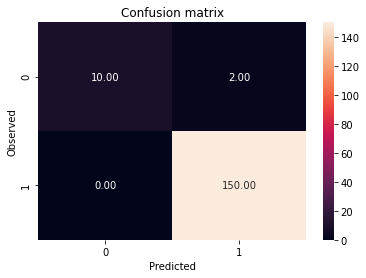

In [214]:
# create and plot confusion matrix
cm = confusion_matrix( y_test, y_predict)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [215]:
"""
This means 10 actual failures, 152 actual successes
For plotting purposes, we cannot plot many dimensions, so we will choose features and apply
Principal Component Analysis to best visualize.

"""

'\nThis means 10 actual failures, 152 actual successes\nFor plotting purposes, we cannot plot many dimensions, so we will choose features and apply\nPrincipal Component Analysis to best visualize.\n\n'

In [217]:
model = ExtraTreesClassifier(n_estimators=1000)
model.fit(X,Y)
labels = data.head(0)
importance =np.array(model.feature_importances_)

print("Feature Importance: ")
print(importance)

Feature Importance: 
[0.13932316 0.13710971 0.03687894 0.04296503 0.04151428 0.03884768
 0.03715339 0.04028981 0.04292226 0.03701149 0.04062569 0.03880305
 0.07929199 0.07835309 0.04073677 0.04561153 0.04187218 0.04068997]


In [221]:
"""
Using the ExtraTreesClassifier, we find the most important features with respect 
to the succeessful outcome are vconst_corr with an importance of 0.13932316, and vconst_2 
with an importance of 0.13710971. All other variable have an importance < 0.1.

"""

'\nUsing the ExtraTreesClassifier, we find the most important features with respect \nto the succeessful outcome are vconst_corr with an importance of 0.13932316, and vconst_2 \nwith an importance of 0.13710971. All other variable have an importance < 0.1.\n\n'

In [231]:
# create a mesh to plot with first 2 features
model = PCA(n_components=2)           
model.fit(X)                    
X_2D = model.transform(X)      

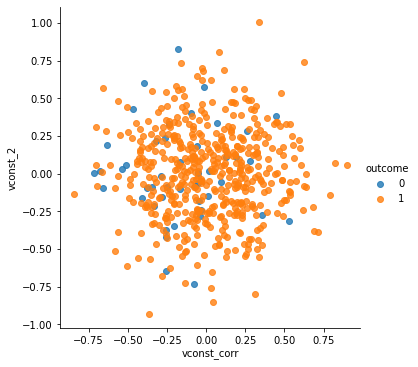

In [239]:
data['vconst_corr'] = X_2D[:, 0]
data['vconst_2'] = X_2D[:, 1]
sns.lmplot("vconst_corr", "vconst_2", hue = 'outcome', data=data, fit_reg=False);

In [244]:
# Visualization of features of data before doing any operations

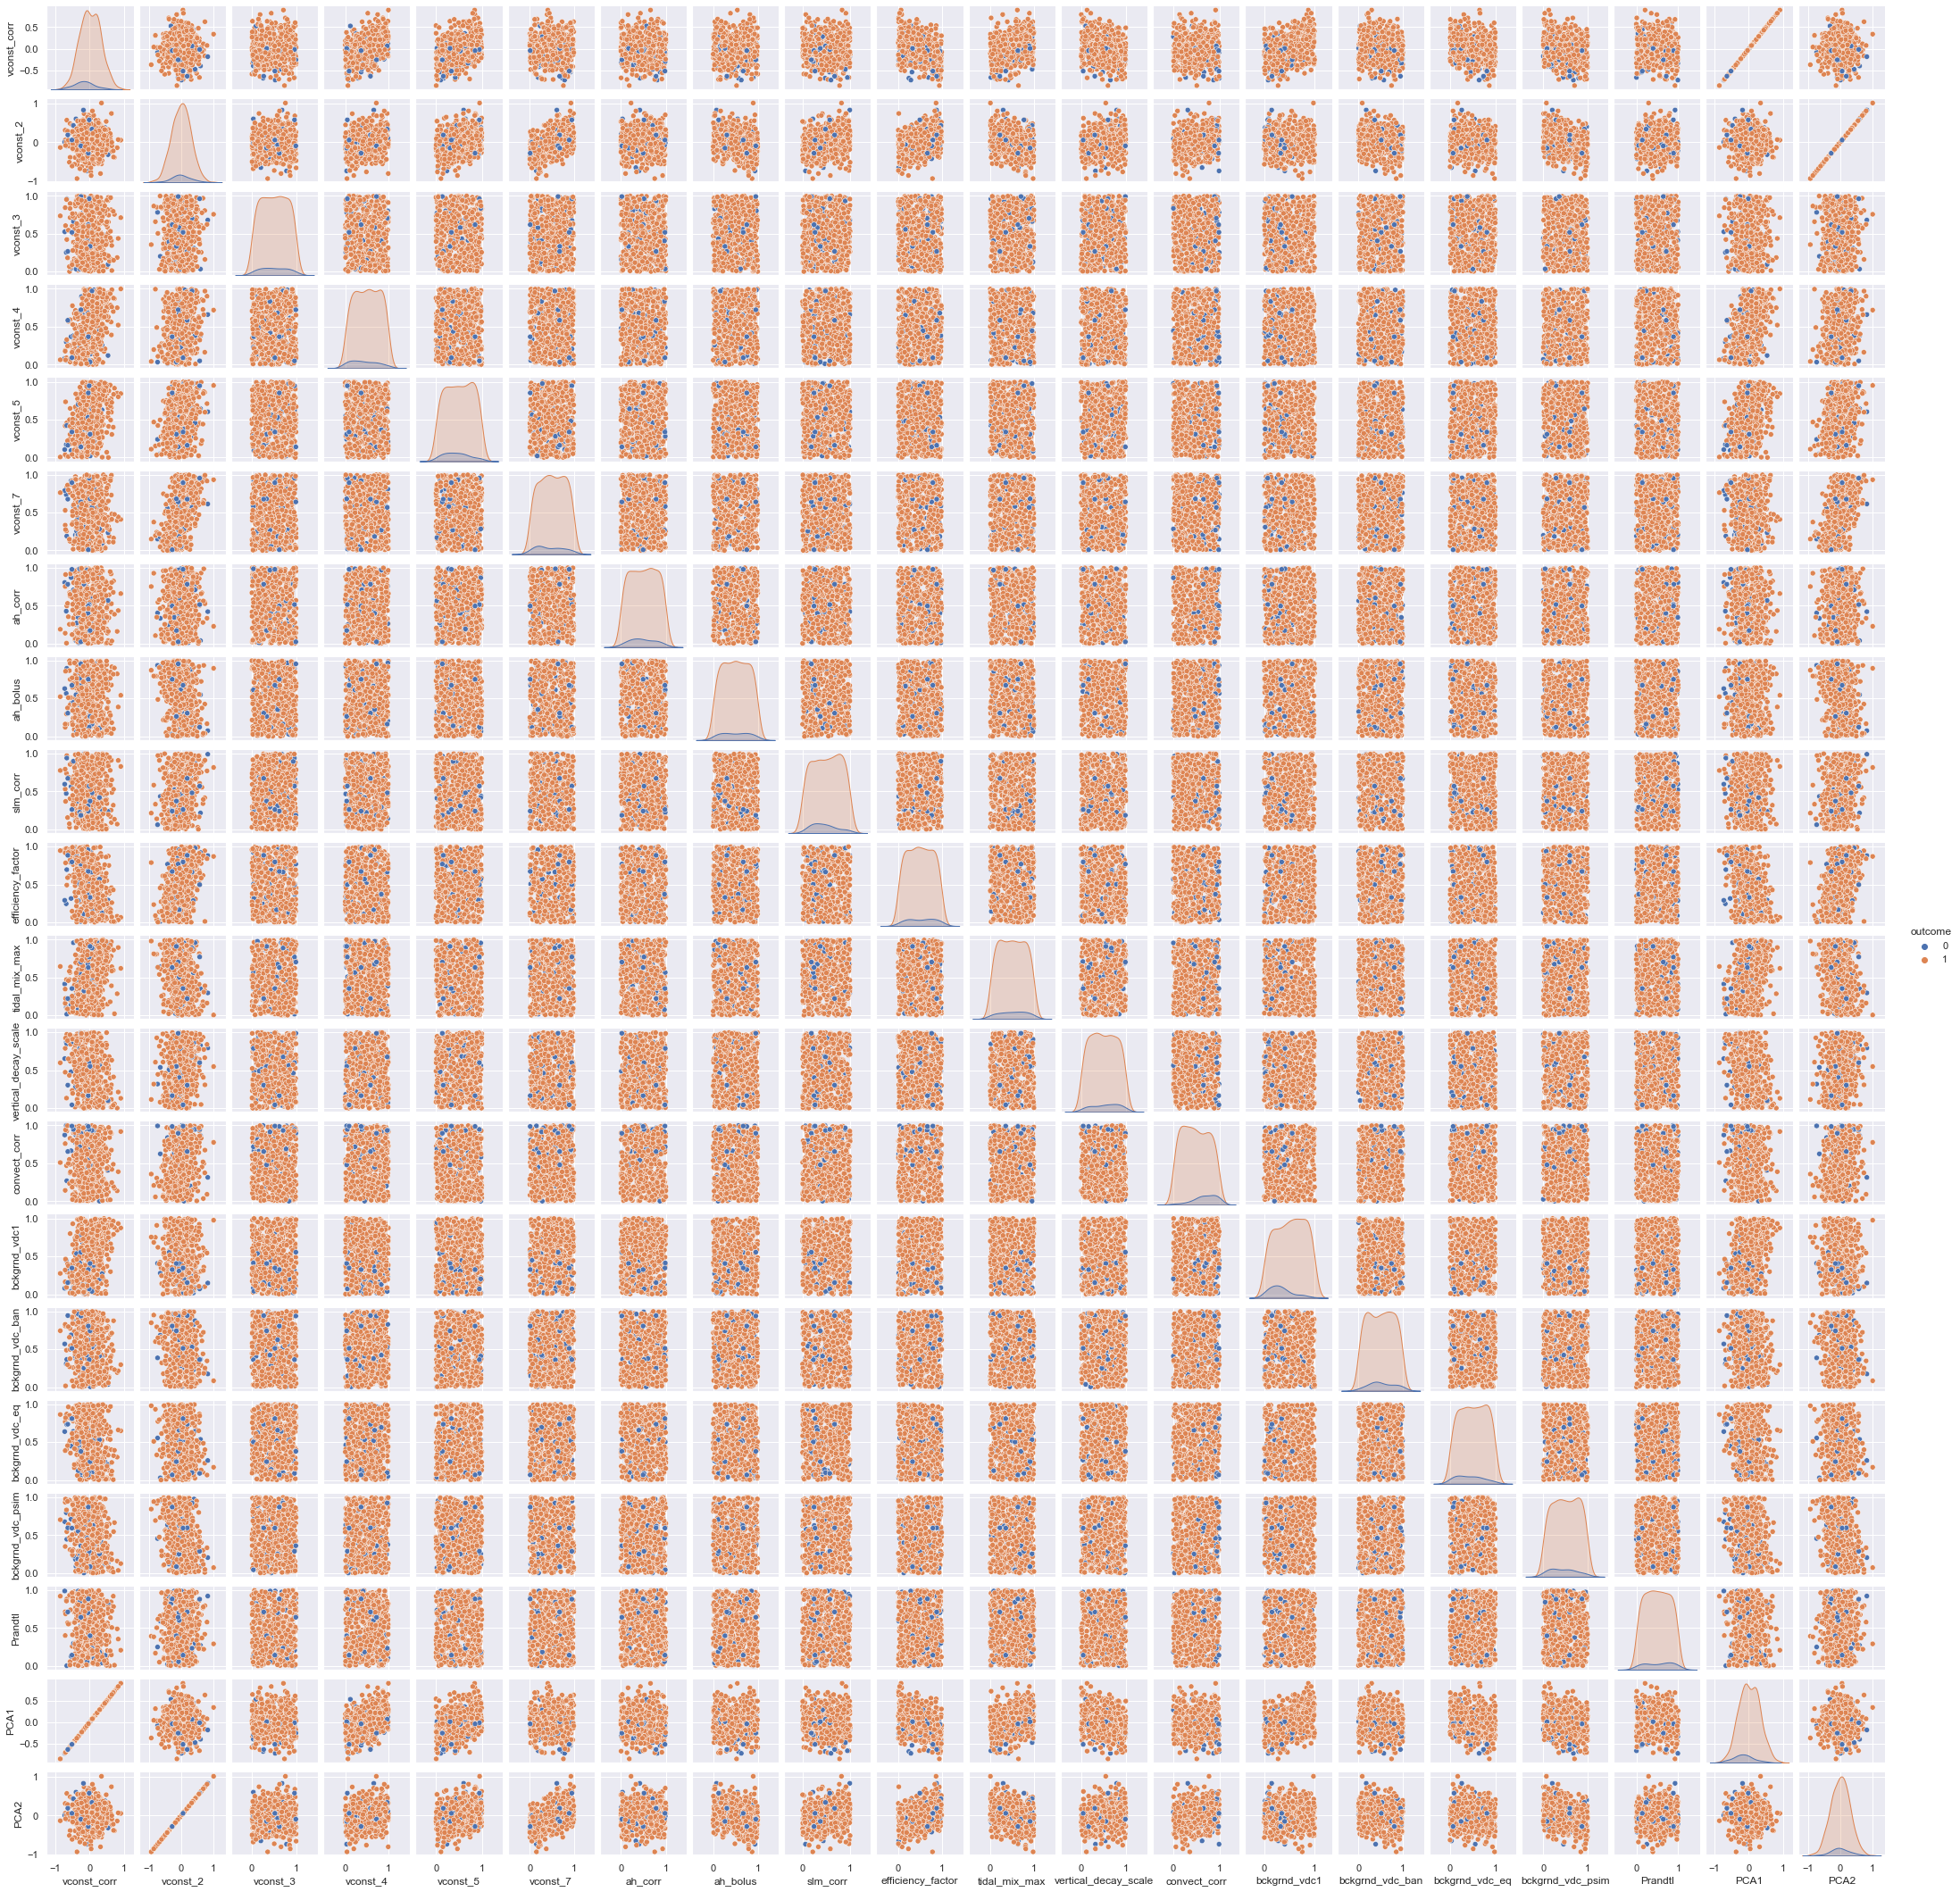

In [243]:
import seaborn as sns; sns.set()
sns.pairplot(data.drop('Run', axis=1).drop('Study', axis=1), hue='outcome', size=1.5);